In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
mask_files=os.listdir("./data/with_mask")
mask_path="./data/with_mask/"
no_mask_path="./data/without_mask/"
no_mask_files=os.listdir("./data/without_mask")

In [3]:
len(mask_files)

3725

In [4]:
len(no_mask_files)

3828

balanced data

In [5]:
mask_labels=[1]*len(mask_files)
no_mask_labels=[0]*len(no_mask_files)

In [6]:
no_mask_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [7]:
labels=mask_labels+no_mask_labels

In [8]:
labels[-5:]

[0, 0, 0, 0, 0]

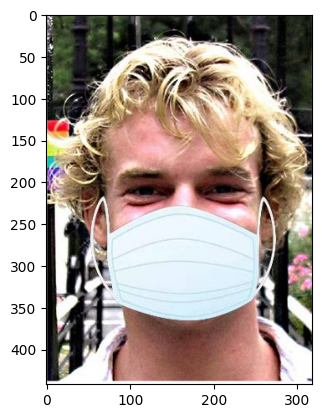

In [9]:
img1=mpimage.imread("./data/with_mask/with_mask_1010.jpg")
plt.imshow(img1)

* there are diffrence in size of images
* resize
* convert to np array

In [10]:
data=[]
for img in mask_files:
    image=Image.open(mask_path+img)
    image=image.resize((128,128))
    image=image.convert("RGB")
    image=np.array(image)
    data.append(image)
    
for img in no_mask_files:
    image=Image.open(no_mask_path+img)
    image=image.resize((128,128))
    image=image.convert("RGB")
    image=np.array(image)
    data.append(image)

c:\Users\Arash\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
print(len(data))
print(type(data))
print(data[0])

7553
<class 'list'>
[[[50 58 31]
  [46 55 33]
  [56 58 42]
  ...
  [27 32 25]
  [29 33 19]
  [33 40 17]]

 [[47 54 30]
  [49 58 36]
  [59 63 40]
  ...
  [18 21 11]
  [37 42 31]
  [31 41 23]]

 [[51 58 37]
  [50 59 37]
  [59 64 37]
  ...
  [45 44 30]
  [29 34 27]
  [20 30 18]]

 ...

 [[63 73 37]
  [66 75 41]
  [74 84 50]
  ...
  [ 5  3  0]
  [20 19 14]
  [17 16 12]]

 [[58 72 34]
  [60 70 39]
  [68 75 49]
  ...
  [16 15 12]
  [15 13 10]
  [13  9  7]]

 [[53 69 30]
  [53 64 37]
  [57 64 42]
  ...
  [18 18 16]
  [16 13 12]
  [19 12 13]]]


In [12]:
data[0].shape

(128, 128, 3)

In [13]:
x=np.array(data)
y=np.array(labels)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [15]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

# CNN

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(364,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(classes,activation="sigmoid"))


model.compile("adam",loss="sparse_categorical_crossentropy",metrics=["acc"])

In [18]:
hist=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 1476s 9s/step - loss: 0.5155 - acc: 0.8161 - val_loss: 0.3792 - val_acc: 0.8248
Epoch 2/10
170/170 [==============================] - 1802s 11s/step - loss: 0.3022 - acc: 0.8781 - val_loss: 0.2424 - val_acc: 0.8926
Epoch 3/10
170/170 [==============================] - 1397s 8s/step - loss: 0.2577 - acc: 0.8959 - val_loss: 0.2319 - val_acc: 0.9157
Epoch 4/10
170/170 [==============================] - 1383s 8s/step - loss: 0.2201 - acc: 0.9101 - val_loss: 0.1865 - val_acc: 0.9289
Epoch 5/10
170/170 [==============================] - 5365s 32s/step - loss: 0.1994 - acc: 0.9239 - val_loss: 0.1906 - val_acc: 0.9240
Epoch 6/10
125/170 [=====================>........] - ETA: 7:14 - loss: 0.1724 - acc: 0.9337

: 

In [ ]:
loss,acc=model.evaluate(x_test_scaled,y_test)
print("TEST ACCURACY :",acc)

In [ ]:
plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="val loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(hist.history["acc"],label="train acc")
plt.plot(hist.history["val_acc"],label="val acc")
plt.legend()
plt.show()